In [20]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
## create this two folders
IN_DIR = "data_from_sol_22_updated"
OUT_DIR = "frctal_applied_from_sol_22"

In [22]:
## this contains the data for all the years and month to form a continous flow of data combining multiple dtaa sources like from different satelites
## the data is chosen based on number_of_missing values in a given data source.
df_data = pd.read_csv("continuous_data.csv")
df_data

,file_names,satellite,year,month,total_rows,missing_values
0,1986/g05_xrs_1m_19860101_19860131.csv,goes05,1986,1,44640,617
1,1986/g05_xrs_1m_19860201_19860228.csv,goes05,1986,2,40320,203
2,1986/g05_xrs_1m_19860301_19860331.csv,goes05,1986,3,44640,2686
3,1986/g05_xrs_1m_19860401_19860430.csv,goes05,1986,4,43200,3646
4,1986/g05_xrs_1m_19860501_19860531.csv,goes05,1986,5,44640,517
...,...,...,...,...,...,...
403,2019/g14_xrs_1m_20191001_20191031.csv,goes14,2019,10,44640,986
404,2019/g14_xrs_1m_20191101_20191130.csv,goes14,2019,11,43200,161
405,2019/g15_xrs_1m_20191201_20191231.csv,goes15,2019,12,44640,36
406,2020/g15_xrs_1m_20200101_20200131.csv,goes15,2020,1,44640,584


In [23]:
def create_folder(year: int):
    #create folder to hold the data
    os.makedirs(f"{OUT_DIR}/{year}", exist_ok = True)

In [24]:
## the logic here is to fill the data using ffill method if total missing in a file is less than or equal 50 
for index, row in df_data.iterrows():
    if row.missing_values <= 50:
        df = pd.read_csv(os.path.join(IN_DIR, row.file_names))
        create_folder(row.year)
        before_filling = (df['xl'] == -99999).sum()
        
        #ffill data where missing_value count <=50
        df.replace(-99999, pd.NA, inplace=True)
        df.fillna(method='ffill', inplace=True)
        
        after_filling = (df['xl'] == -99999).sum()
        # save updated data
        df.to_csv(os.path.join(OUT_DIR, row.file_names), index = False)
        

In [25]:
df_data[df_data['missing_values'] <= 50]

,file_names,satellite,year,month,total_rows,missing_values
28,1988/g07_xrs_1m_19880501_19880531.csv,goes07,1988,5,44640,50
34,1988/g07_xrs_1m_19881101_19881130.csv,goes07,1988,11,43200,32
40,1989/g07_xrs_1m_19890501_19890531.csv,goes07,1989,5,44640,49
41,1989/g07_xrs_1m_19890601_19890630.csv,goes07,1989,6,43200,34
58,1990/g07_xrs_1m_19901101_19901130.csv,goes07,1990,11,43200,28
...,...,...,...,...,...,...
381,2017/g15_xrs_1m_20171201_20171231.csv,goes15,2017,12,44640,44
386,2018/g14_xrs_1m_20180501_20180531.csv,goes14,2018,5,44640,46
393,2018/g14_xrs_1m_20181201_20181231.csv,goes14,2018,12,44640,32
400,2019/g14_xrs_1m_20190701_20190731.csv,goes14,2019,7,44640,40


In [26]:
# it holds the data which files  missing values exceeds more than 50 rows
df_missing_info = df_data[df_data['missing_values'] > 50].reset_index(drop = True)
df_missing_info

,file_names,satellite,year,month,total_rows,missing_values
0,1986/g05_xrs_1m_19860101_19860131.csv,goes05,1986,1,44640,617
1,1986/g05_xrs_1m_19860201_19860228.csv,goes05,1986,2,40320,203
2,1986/g05_xrs_1m_19860301_19860331.csv,goes05,1986,3,44640,2686
3,1986/g05_xrs_1m_19860401_19860430.csv,goes05,1986,4,43200,3646
4,1986/g05_xrs_1m_19860501_19860531.csv,goes05,1986,5,44640,517
...,...,...,...,...,...,...
335,2019/g15_xrs_1m_20190901_20190930.csv,goes15,2019,9,43200,1962
336,2019/g14_xrs_1m_20191001_20191031.csv,goes14,2019,10,44640,986
337,2019/g14_xrs_1m_20191101_20191130.csv,goes14,2019,11,43200,161
338,2020/g15_xrs_1m_20200101_20200131.csv,goes15,2020,1,44640,584


In [31]:
import numpy as np
import scipy, random 
import matplotlib.pyplot as plt
def d( x ):
    # expects an enumerable, subtracts the right endpoint from the left
    return float(x[-1]-x[0])


def an( x, i ):
    # the (0,0) element in the rotation matrix of the iterated function system (IFS)
    return ( x[i] - x[i-1] )/d(x)


def dn( x, i ):
    # the (0) element in the translation vector of the IFS
    return ( x[-1]*x[i-1] - x[0]*x[i] )/d(x)


def cn( x, y, i, sn ):
    # the (1,0) element in the rotation matrix of the IFS
    return ( y[i] - y[i-1] )/d(x) - sn*( y[-1] - y[0] )/d(x)


def en( x, y, i, sn ):
    # the (1) element in the translation vector of the IFS
    return ( x[-1]*y[i-1] - x[0]*y[i])/d(x) - sn*( x[-1]*y[0] - x[0]*y[-1] )/d(x)

def Wn( X, U, i, sn ):
    '''
    the iterated function sytem
      R is the rotation matrix
      T is the translation vector
    computes
      R*X + T
    '''
    # rotation matrix
    R = np.matrix([[ an(U[:,0],i), 0 ],\
                   [ cn(U[:,0],U[:,1],i,sn), sn ]])
    # transalation vector
    T = np.matrix([[ dn(U[:,0],i) ],\
                   [ en(U[:,0],U[:,1],i,sn) ]])
    # calculate R*X + T
    tmp = R * np.matrix(X).T + T
    # return the new points
    xp, yp = np.array( tmp.T )[0]
    return xp, yp
    
def FIF( U, nth, sn, balance=False ):
    # the fractal interpolating function
    X = U.copy()
    x, y = list( X[:,0] ), list( X[:,1] )
    M = U.shape[0]

    for i in range(nth):
        # call an IFS for each segment
        for j in range( 1,M ):
            xp, yp = Wn( X[i], U, j, sn )
            x.append( xp )
            y.append( yp )
            if balance:
                xp, yp = Wn( X[i], U, j, -sn )
                x.append( xp )
                y.append( yp )
    x = np.array(x)
    y = np.array(y)
    # this puts the interpolated
    # data points at the bottom of X
    X = np.vstack((x,y)).T
    X = X[ X[:,0].argsort() ]
    # these two lines rearrage X so that the interpolated
    # data points are between the original data points
    null, indices = np.unique( X[:,0], return_index=True )
    X = X[ indices ]
    return X


In [32]:
def select_nth_values_and_build_df(df_with_missing, nth = 10):
    df_with_missing["xs_copy"] = df_with_missing["xs"]
    df_with_missing["xl_copy"] = df_with_missing["xl"]

    # Get the last row of the DataFrame
    last_row = df_with_missing.iloc[-1]

    # Create a new index for the new row
    new_index = len(df_with_missing)

    # Add the new row to the DataFrame with a different index
    # this extra row helps to keep the same length after the interpolation
    df_with_missing.loc[new_index] = last_row

    # bfill and ffill all the missing rows.
    # the idea here is to interpolate data on all the filled values and 
    # then take only the missing values in the final df
    df_with_missing['xs_copy'] = df_with_missing['xs_copy'].replace(-99999, method='bfill')
    df_with_missing['xl_copy'] = df_with_missing['xl_copy'].replace(-99999, method='bfill')
    df_with_missing['xs_copy'] = df_with_missing['xs_copy'].replace(-99999, method='ffill')
    df_with_missing['xl_copy'] = df_with_missing['xl_copy'].replace(-99999, method='ffill')

    ## there is also some data that are corrupted and contains values 32700
    df_with_missing['xs_copy'] = df_with_missing['xs_copy'].replace(32700, method='bfill')
    df_with_missing['xl_copy'] = df_with_missing['xl_copy'].replace(32700, method='bfill')
    df_with_missing['xs_copy'] = df_with_missing['xs_copy'].replace(32700, method='ffill')
    df_with_missing['xl_copy'] = df_with_missing['xl_copy'].replace(32700, method='ffill')

    df_nth_taken = df_with_missing[::nth].reset_index(drop = True)
    return df_nth_taken

In [33]:
def apply_interpolation_and_get_data(df_nth_taken, df_with_missing, nth):
    xs = df_nth_taken["xs_copy"].tolist()
    xl = df_nth_taken["xl_copy"].tolist()
    indexs = df_nth_taken.index.tolist()

    np_xs = np.array(xs)
    np_xl = np.array(xl)
    np_indexs = np.array(indexs)

    stacked_xs = np.vstack((np_indexs, np_xs)).T
    stacked_xl = np.vstack((np_indexs, np_xl)).T

    ## 0.01 is our vertical scaling factor. You can control it to get new interpolated data
    interpolated_xs = FIF(stacked_xs, nth, 0.01)
    interpolated_xl = FIF(stacked_xl, nth, 0.01)

    df_with_missing["xs_interpolated"] = interpolated_xs[:, 1]
    df_with_missing["xl_interpolated"] = interpolated_xl[:, 1]

    ## filtering out the rows based on the logic like:
    ## if the original value is presented them we are taking them
    ## if it is not presented them we will take newly interpolated values.
    df_with_missing['xs'] = df_with_missing.apply(lambda row: row['xs_interpolated'] if row['xs'] == -99999 else row['xs'], axis=1)
    df_with_missing['xl'] = df_with_missing.apply(lambda row: row['xl_interpolated'] if row['xl'] == -99999 else row['xs'], axis=1)

    df_interpolated = df_with_missing[["time_tag", "xs", "xl"]]
    
    return df_interpolated

In [34]:
file_names = df_missing_info["file_names"].tolist()
for i, file_name in enumerate(file_names):
    year = file_name.split("/")[0]
    create_folder(year)
    print("path:", os.path.join(IN_DIR, file_name))
    df_with_missing = pd.read_csv(os.path.join(IN_DIR, file_name))

    ## Here the idea is to take each tenth values of the given file
    ## and then interpolate the in between data and after that filted them
    df_nth_taken = select_nth_values_and_build_df(df_with_missing, nth = 10)
    
    df_interpolated = apply_interpolation_and_get_data(df_nth_taken, df_with_missing, nth = 10)
    
    ## dropping it as we have added it extra in our process
    df_interpolated = df_interpolated.drop(df_interpolated.index[-1])
    
    df_interpolated.to_csv(os.path.join(OUT_DIR, file_name), index = False)

path: data_from_sol_22_updated/1986/g05_xrs_1m_19860101_19860131.csv
path: data_from_sol_22_updated/1986/g05_xrs_1m_19860201_19860228.csv
path: data_from_sol_22_updated/1986/g05_xrs_1m_19860301_19860331.csv
path: data_from_sol_22_updated/1986/g05_xrs_1m_19860401_19860430.csv
path: data_from_sol_22_updated/1986/g05_xrs_1m_19860501_19860531.csv
path: data_from_sol_22_updated/1986/g05_xrs_1m_19860601_19860630.csv
path: data_from_sol_22_updated/1986/g05_xrs_1m_19860701_19860731.csv
path: data_from_sol_22_updated/1986/g05_xrs_1m_19860801_19860831.csv
path: data_from_sol_22_updated/1986/g05_xrs_1m_19860901_19860930.csv
path: data_from_sol_22_updated/1986/g05_xrs_1m_19861001_19861031.csv
path: data_from_sol_22_updated/1986/g05_xrs_1m_19861101_19861130.csv
path: data_from_sol_22_updated/1986/g05_xrs_1m_19861201_19861231.csv
path: data_from_sol_22_updated/1987/g06_xrs_1m_19870101_19870131.csv
path: data_from_sol_22_updated/1987/g06_xrs_1m_19870201_19870228.csv
path: data_from_sol_22_updated/198

## Simple data quality checks

In [35]:
##  checking if there is any more missing values in our data
file_names = df_data["file_names"].tolist()
for i, file_name in enumerate(file_names):
    df = pd.read_csv(os.path.join(OUT_DIR, file_name))
    s = (df['xl'] == -99999).sum()
    print(file_name, s)

1986/g05_xrs_1m_19860101_19860131.csv 0
1986/g05_xrs_1m_19860201_19860228.csv 0
1986/g05_xrs_1m_19860301_19860331.csv 0
1986/g05_xrs_1m_19860401_19860430.csv 0
1986/g05_xrs_1m_19860501_19860531.csv 0
1986/g05_xrs_1m_19860601_19860630.csv 0
1986/g05_xrs_1m_19860701_19860731.csv 0
1986/g05_xrs_1m_19860801_19860831.csv 0
1986/g05_xrs_1m_19860901_19860930.csv 0
1986/g05_xrs_1m_19861001_19861031.csv 0
1986/g05_xrs_1m_19861101_19861130.csv 0
1986/g05_xrs_1m_19861201_19861231.csv 0
1987/g06_xrs_1m_19870101_19870131.csv 0
1987/g06_xrs_1m_19870201_19870228.csv 0
1987/g06_xrs_1m_19870301_19870331.csv 0
1987/g07_xrs_1m_19870401_19870430.csv 0
1987/g07_xrs_1m_19870501_19870531.csv 0
1987/g07_xrs_1m_19870601_19870630.csv 0
1987/g07_xrs_1m_19870701_19870731.csv 0
1987/g07_xrs_1m_19870801_19870831.csv 0
1987/g06_xrs_1m_19870901_19870930.csv 0
1987/g07_xrs_1m_19871001_19871031.csv 0
1987/g07_xrs_1m_19871101_19871130.csv 0
1987/g07_xrs_1m_19871201_19871231.csv 0
1988/g07_xrs_1m_19880101_19880131.csv 0


In [36]:
## merge all dataframe to get a continuous data file
dataframes = []
for file_name in file_names:
    df = pd.read_csv(os.path.join(OUT_DIR, file_name))
    dataframes.append(df)

# Concatenate the list of DataFrames into one DataFrame
concatenated_df = pd.concat(dataframes, ignore_index=True)
concatenated_df.to_csv("sol_22_23_24_data_no_missing_v2.0.csv", index = False)

In [39]:
concatenated_df.describe()

,xs,xl
count,1.787904e+07,1.787904e+07
mean,5.574662e+00,5.574662e+00
std,4.269196e+02,4.269196e+02
min,-1.157632e-08,-1.131665e-08
25%,1.160000e-09,1.550000e-09
50%,4.646900e-09,6.890000e-09
75%,1.690000e-08,3.560000e-08
max,3.270000e+04,3.270000e+04


In [38]:
max_value = concatenated_df['xs'].max()
min_value = concatenated_df['xs'].min()

print(f"Max value of column xs: {max_value}")
print(f"Min value of column xs: {min_value}")

Max value of column xs: 32700.0
Min value of column xs: -1.1576319354838711e-08


In [54]:
import pandas as pd

# Create a DataFrame with your data (replace this with your actual DataFrame)
data = {'time_tag': ["1","2",'1986-01-01 00:00:00.000', '1986-01-01 00:01:00.000',"1","2",'1986-01-01 00:00:00.000', '1986-01-01 00:01:00.000', '1986-01-01 00:02:00.000', '1986-01-01 00:03:00.000', '1986-01-01 00:04:00.000', '1986-01-01 00:05:00.000', "'1986-01-01 00:05:00.000'"],
        'xs': ["2E-2", '3.19E-11', '4.19E-11', '5.619E-3', '6.719E-11', '6.819E-11', '7.19E-3', "5.12E-1", "1E-4", '6.319E-11', '2.19E-3', "5.2E-1", "1E-4"]}

df = pd.DataFrame(data)

# Convert 'xs' column to numeric (it might be stored as strings)
df['xs'] = pd.to_numeric(df['xs'], errors='coerce')

# Define the target value
target_value = 1E-4
window = 5
# Initialize lists to store X_train and Y_train
X_train_list = []
Y_train_list = []

# Iterate through the DataFrame to find X_train and Y_train
for i in range(len(df)):
    if df.loc[i, 'xs'] >= target_value and i+1 > window:

        X_train = df.loc[i-window:i-1, 'xs'].values
        #print(X_train)
        Y_train = df.loc[i, 'xs']
        X_train_list.append(X_train)
        Y_train_list.append(Y_train)

# Create a new DataFrame for X_train and Y_train
X_train_df = pd.DataFrame(X_train_list, columns=['X_train_{}'.format(i) for i in range(window)])
Y_train_df = pd.DataFrame({'Y_train': Y_train_list})

# Display X_train and Y_train DataFrames
print(X_train_df)
print(Y_train_df)


      X_train_0     X_train_1     X_train_2     X_train_3     X_train_4
0  3.190000e-11  4.190000e-11  5.619000e-03  6.719000e-11  6.819000e-11
1  4.190000e-11  5.619000e-03  6.719000e-11  6.819000e-11  7.190000e-03
2  5.619000e-03  6.719000e-11  6.819000e-11  7.190000e-03  5.120000e-01
3  6.819000e-11  7.190000e-03  5.120000e-01  1.000000e-04  6.319000e-11
4  7.190000e-03  5.120000e-01  1.000000e-04  6.319000e-11  2.190000e-03
5  5.120000e-01  1.000000e-04  6.319000e-11  2.190000e-03  5.200000e-01
   Y_train
0  0.00719
1  0.51200
2  0.00010
3  0.00219
4  0.52000
5  0.00010


In [58]:
import os
import pandas as pd

TRAIN_DIR = "solar_flare_training_data"
os.makedirs(TRAIN_DIR, exist_ok = True)

def split_data_in_train_and_test(df, col_name, window):
    # target value 
    #M flare - between 10^-5 and 10^-4
    #X Flare - above 10^-4
    target_value = 1E-5
    # Initialize lists to store X_train and Y_train
    X_train_list = []
    Y_train_list = []

    # Iterate through the DataFrame to find X_train and Y_train
    for i in range(len(df)):
        if df.loc[i, col_name] >= target_value and i+1 > window:
            X_train = df.loc[i-window:i-1, col_name].values
            Y_train = df.loc[i, col_name]
            
            X_train_list.append(X_train)
            Y_train_list.append(Y_train)

    # Create a new DataFrame for X_train and Y_train
    X_train_df = pd.DataFrame(X_train_list, columns=['X_train_{}'.format(i) for i in range(window)])
    Y_train_df = pd.DataFrame({'Y_train': Y_train_list})
    
    X_train_df.to_csv(os.path.join(TRAIN_DIR, "X_Train.csv"), index = False)
    Y_train_df.to_csv(os.path.join(TRAIN_DIR, "Y_Train.csv"), index = False)
    
if __name__ == "__main__":
    print("Before running it keep it same as data source like sol_22_23_24_data_no_missing_v1.0.csv")
    print("Enter column name: (this should be xs or xl)")
    col_name = input()
    print("Enter window size:")
    window_size = int(input())
    df = pd.read_csv("sol_22_23_24_data_no_missing_v1.0.csv")
    split_data_in_train_and_test(df, col_name, window_size)

Before running it keep it same as data source like sol_22_23_24_data_no_missing_v1.0.csv
Enter column name: (this should be xs or xl)
xs
Enter window size:
120


KeyboardInterrupt: 

In [8]:
Y_train_df

,Y


In [8]:
df_with_missing = pd.read_csv(os.path.join(IN_DIR, "1986/g05_xrs_1m_19860101_19860131.csv"))
df_with_missing

,time_tag,xs,xl
0,1986-01-01 00:00:00.000,6.190000e-11,1.030000e-09
1,1986-01-01 00:01:00.000,6.190000e-11,1.030000e-09
2,1986-01-01 00:02:00.000,6.190000e-11,1.030000e-09
3,1986-01-01 00:03:00.000,6.190000e-11,1.030000e-09
4,1986-01-01 00:04:00.000,6.190000e-11,1.030000e-09
...,...,...,...
44635,1986-01-31 23:55:00.000,1.200000e-09,1.460000e-07
44636,1986-01-31 23:56:00.000,4.040000e-10,1.470000e-07
44637,1986-01-31 23:57:00.000,2.910000e-10,1.400000e-07
44638,1986-01-31 23:58:00.000,3.730000e-10,1.360000e-07


In [9]:
nth = 10
df_with_missing["xs_copy"] = df_with_missing["xs"]
df_with_missing["xl_copy"] = df_with_missing["xl"]

# Get the last row of the DataFrame
last_row = df_with_missing.iloc[-1]

# Create a new index for the new row
new_index = len(df_with_missing)

# Add the new row to the DataFrame with a different index
df_with_missing.loc[new_index] = last_row


df_with_missing['xs_copy'] = df_with_missing['xs_copy'].replace(-99999, method='ffill')
df_with_missing['xl_copy'] = df_with_missing['xl_copy'].replace(-99999, method='ffill')

df_nth_taken = df_with_missing[::nth].reset_index(drop = True)
df_nth_taken

,time_tag,xs,xl,xs_copy,xl_copy
0,1986-01-01 00:00:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09
1,1986-01-01 00:10:00.000,1.270000e-10,1.030000e-09,1.270000e-10,1.030000e-09
2,1986-01-01 00:20:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09
3,1986-01-01 00:30:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09
4,1986-01-01 00:40:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09
...,...,...,...,...,...
4460,1986-01-31 23:20:00.000,6.520000e-10,1.460000e-07,6.520000e-10,1.460000e-07
4461,1986-01-31 23:30:00.000,9.310000e-11,1.030000e-07,9.310000e-11,1.030000e-07
4462,1986-01-31 23:40:00.000,9.310000e-11,8.320000e-08,9.310000e-11,8.320000e-08
4463,1986-01-31 23:50:00.000,4.040000e-10,1.180000e-07,4.040000e-10,1.180000e-07


In [10]:
df_with_missing

,time_tag,xs,xl,xs_copy,xl_copy
0,1986-01-01 00:00:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09
1,1986-01-01 00:01:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09
2,1986-01-01 00:02:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09
3,1986-01-01 00:03:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09
4,1986-01-01 00:04:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09
...,...,...,...,...,...
44636,1986-01-31 23:56:00.000,4.040000e-10,1.470000e-07,4.040000e-10,1.470000e-07
44637,1986-01-31 23:57:00.000,2.910000e-10,1.400000e-07,2.910000e-10,1.400000e-07
44638,1986-01-31 23:58:00.000,3.730000e-10,1.360000e-07,3.730000e-10,1.360000e-07
44639,1986-01-31 23:59:00.000,1.110000e-10,1.290000e-07,1.110000e-10,1.290000e-07


In [12]:
xs = df_nth_taken["xs_copy"].tolist()
xl = df_nth_taken["xl_copy"].tolist()
indexs = df_nth_taken.index.tolist()

np_xs = np.array(xs)
np_xl = np.array(xl)
np_indexs = np.array(indexs)

stacked_xs = np.vstack((np_indexs, np_xs)).T
stacked_xl = np.vstack((np_indexs, np_xl)).T

interpolated_xs = FIF(stacked_xs, 0.01)
interpolated_xl = FIF(stacked_xl, 0.01)

df_with_missing["xs_interpolated"] = interpolated_xs[:, 1]
df_with_missing["xl_interpolated"] = interpolated_xl[:, 1]

df_with_missing['xs'] = df_with_missing.apply(lambda row: row['xs_interpolated'] if row['xs'] == -99999 else row['xs'], axis=1)
df_with_missing['xl'] = df_with_missing.apply(lambda row: row['xl_interpolated'] if row['xl'] == -99999 else row['xs'], axis=1)
df_interpolated = df_with_missing[["time_tag", "xs", "xl"]]


In [13]:
df_with_missing["xs_interpolated"] = interpolated_xs[:, 1]
df_with_missing["xl_interpolated"] = interpolated_xl[:, 1]
df_with_missing

,time_tag,xs,xl,xs_copy,xl_copy,xs_interpolated,xl_interpolated
0,1986-01-01 00:00:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09
1,1986-01-01 00:01:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09,6.256547e-11,1.029713e-09
2,1986-01-01 00:02:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09,6.192895e-11,1.029427e-09
3,1986-01-01 00:03:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09,6.194342e-11,1.029140e-09
4,1986-01-01 00:04:00.000,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09,6.195789e-11,1.028853e-09
...,...,...,...,...,...,...,...
44636,1986-01-31 23:56:00.000,4.040000e-10,1.470000e-07,4.040000e-10,1.470000e-07,4.037605e-10,1.180131e-07
44637,1986-01-31 23:57:00.000,2.910000e-10,1.400000e-07,2.910000e-10,1.400000e-07,4.035398e-10,1.180152e-07
44638,1986-01-31 23:58:00.000,3.730000e-10,1.360000e-07,3.730000e-10,1.360000e-07,4.036290e-10,1.180174e-07
44639,1986-01-31 23:59:00.000,1.110000e-10,1.290000e-07,1.110000e-10,1.290000e-07,4.111793e-10,1.180214e-07


In [15]:
df_with_missing['xs'] = df_with_missing.apply(lambda row: row['xs_interpolated'] if row['xs'] == -99999 else row['xs'], axis=1)
df_with_missing['xl'] = df_with_missing.apply(lambda row: row['xl_interpolated'] if row['xl'] == -99999 else row['xs'], axis=1)
df_interpolated = df_with_missing[["time_tag", "xs", "xl"]]


,time_tag,xs,xl,xs_copy,xl_copy,xs_interpolated,xl_interpolated
0,1986-01-01 00:00:00.000,6.190000e-11,6.190000e-11,6.190000e-11,1.030000e-09,6.190000e-11,1.030000e-09
1,1986-01-01 00:01:00.000,6.190000e-11,6.190000e-11,6.190000e-11,1.030000e-09,6.256547e-11,1.029713e-09
2,1986-01-01 00:02:00.000,6.190000e-11,6.190000e-11,6.190000e-11,1.030000e-09,6.192895e-11,1.029427e-09
3,1986-01-01 00:03:00.000,6.190000e-11,6.190000e-11,6.190000e-11,1.030000e-09,6.194342e-11,1.029140e-09
4,1986-01-01 00:04:00.000,6.190000e-11,6.190000e-11,6.190000e-11,1.030000e-09,6.195789e-11,1.028853e-09
...,...,...,...,...,...,...,...
44636,1986-01-31 23:56:00.000,4.040000e-10,4.040000e-10,4.040000e-10,1.470000e-07,4.037605e-10,1.180131e-07
44637,1986-01-31 23:57:00.000,2.910000e-10,2.910000e-10,2.910000e-10,1.400000e-07,4.035398e-10,1.180152e-07
44638,1986-01-31 23:58:00.000,3.730000e-10,3.730000e-10,3.730000e-10,1.360000e-07,4.036290e-10,1.180174e-07
44639,1986-01-31 23:59:00.000,1.110000e-10,1.110000e-10,1.110000e-10,1.290000e-07,4.111793e-10,1.180214e-07


In [17]:
df_interpolated = df_with_missing[["time_tag", "xs", "xl"]]
df_interpolated

,time_tag,xs,xl
0,1986-01-01 00:00:00.000,6.190000e-11,6.190000e-11
1,1986-01-01 00:01:00.000,6.190000e-11,6.190000e-11
2,1986-01-01 00:02:00.000,6.190000e-11,6.190000e-11
3,1986-01-01 00:03:00.000,6.190000e-11,6.190000e-11
4,1986-01-01 00:04:00.000,6.190000e-11,6.190000e-11
...,...,...,...
44636,1986-01-31 23:56:00.000,4.040000e-10,4.040000e-10
44637,1986-01-31 23:57:00.000,2.910000e-10,2.910000e-10
44638,1986-01-31 23:58:00.000,3.730000e-10,3.730000e-10
44639,1986-01-31 23:59:00.000,1.110000e-10,1.110000e-10


In [18]:
df_interpolated[df_interpolated["xs"]== -99999]

,time_tag,xs,xl


In [16]:
df_with_missing[df_with_missing["xs"]== -99999]

,time_tag,xs,xl,xs_copy,xl_copy,xs_interpolated,xl_interpolated


In [11]:
df_nth_taken = dff[::10].reset_index(drop = True)
df_nth_taken

,time_tag,xs,xl
0,1988-05-01 00:00:00.000,2.160000e-09,2.570000e-07
1,1988-05-01 00:10:00.000,9.790000e-09,4.210000e-07
2,1988-05-01 00:20:00.000,6.140000e-09,3.390000e-07
3,1988-05-01 00:30:00.000,2.720000e-09,2.840000e-07
4,1988-05-01 00:40:00.000,3.410000e-09,3.180000e-07
...,...,...,...
4460,1988-05-31 23:20:00.000,1.020000e-08,7.910000e-07
4461,1988-05-31 23:30:00.000,9.420000e-09,8.150000e-07
4462,1988-05-31 23:40:00.000,8.280000e-09,7.850000e-07
4463,1988-05-31 23:50:00.000,2.870000e-08,1.140000e-06


In [12]:
xs = sliced_df["xs"].tolist()
index = sliced_df.index.tolist()

In [15]:
np_xs = np.array(xs)
np_index = np.array(index)

In [16]:
np_xs

array([2.16e-09, 9.79e-09, 6.14e-09, ..., 8.28e-09, 2.87e-08, 1.49e-08])

In [17]:
np_index

array([   0,    1,    2, ..., 4462, 4463, 4464])

In [18]:
U = np.vstack((np_index, np_xs)).T

(4465, 2)
(44641, 2)


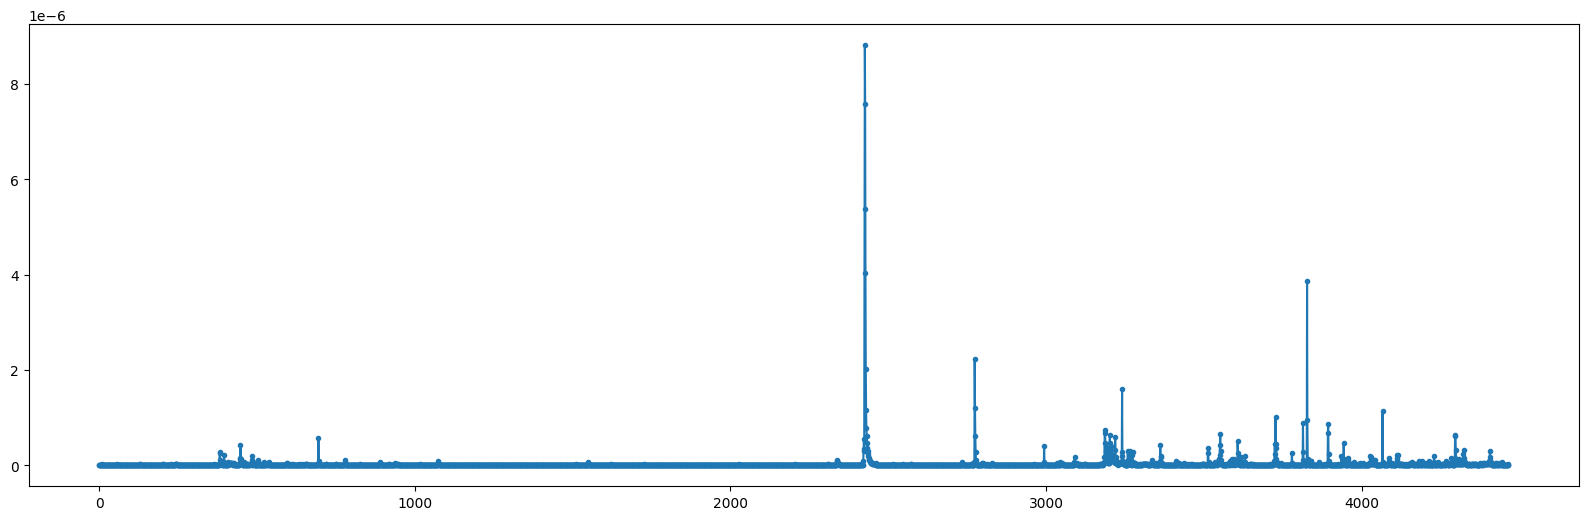

In [77]:
plt.figure(figsize=(20, 6))

print(U.shape)
print(X.shape)
plt.plot( U[:,0], U[:,1], '.-' )
#plt.plot( X[:,0], X[:,1], '.-' )

(44641, 2)


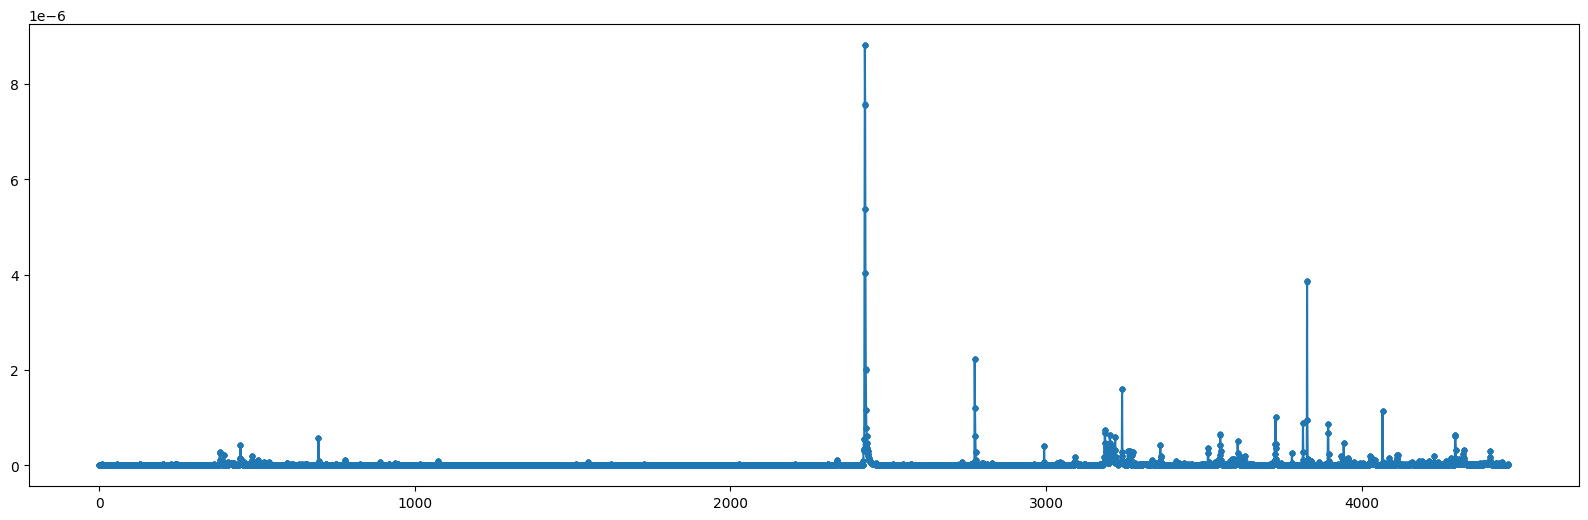

In [22]:
plt.figure(figsize=(20,6))
print(XX.shape)
plt.plot( XX[:,0], XX[:,1], '.-' )

In [20]:
XX  = FIF(U, 0.01)
XX.shape

M 4465 N 4465
8


(44641, 2)

In [23]:
dff

,time_tag,xs,xl
1,1988-05-01 00:00:00.000,2.160000e-09,2.570000e-07
2,1988-05-01 00:01:00.000,2.660000e-09,2.640000e-07
3,1988-05-01 00:02:00.000,2.790000e-09,2.670000e-07
4,1988-05-01 00:03:00.000,3.130000e-09,2.760000e-07
5,1988-05-01 00:04:00.000,8.340000e-09,3.470000e-07
...,...,...,...
44637,1988-05-31 23:56:00.000,1.740000e-08,1.050000e-06
44638,1988-05-31 23:57:00.000,1.640000e-08,1.040000e-06
44639,1988-05-31 23:58:00.000,1.610000e-08,1.020000e-06
44640,1988-05-31 23:59:00.000,1.490000e-08,1.010000e-06


In [24]:
dff["xs_interpolated"] = XX[:, 1]
dff

,time_tag,xs,xl,xs_interpolated
1,1988-05-01 00:00:00.000,2.160000e-09,2.570000e-07,2.160000e-09
2,1988-05-01 00:01:00.000,2.660000e-09,2.640000e-07,2.237981e-09
3,1988-05-01 00:02:00.000,2.790000e-09,2.670000e-07,2.203161e-09
4,1988-05-01 00:03:00.000,3.130000e-09,2.760000e-07,2.170642e-09
5,1988-05-01 00:04:00.000,8.340000e-09,3.470000e-07,2.179223e-09
...,...,...,...,...
44637,1988-05-31 23:56:00.000,1.740000e-08,1.050000e-06,2.867928e-08
44638,1988-05-31 23:57:00.000,1.640000e-08,1.040000e-06,2.867156e-08
44639,1988-05-31 23:58:00.000,1.610000e-08,1.020000e-06,2.870874e-08
44640,1988-05-31 23:59:00.000,1.490000e-08,1.010000e-06,2.881432e-08


In [ ]:
df['xs'] = df.apply(lambda row: row['xs_interpolated'] if row['xs'] == -99999 else row['xs'], axis=1)


In [32]:
import pandas as pd

# Create a sample DataFrame
data = {'Column1': [1, 2, 3, 4, 5],
        'Column2': [6, 7, 8, 9, 10]}

df = pd.DataFrame(data)

# Get the last row of the DataFrame
last_row = df.iloc[-1]

# Create a new index for the new row
new_index = len(df) + 1

# Add the new row to the DataFrame with a different index
df.loc[new_index] = last_row

print(df)


   Column1  Column2
0        1        6
1        2        7
2        3        8
3        4        9
4        5       10
6        5       10


In [39]:
def get_row_and_next(df, index):
    if index < len(df) - 1:
        result =  df.iloc[index:index+2]
        return result["file_names"].to_list()
    else:
        return None

In [47]:
def take_sample_by_N(file_1, file_2, file_1_rows, N=45000):
    df_1 = pd.read_csv(os.path.join(IN_DIR, file_1))
    
    remaining_rows = N - file_1_rows
    df_2 = pd.read_csv(os.path.join(IN_DIR, file_2), nrows = remaining_rows)
    
    merged_df = pd.concat([df_1, df_2], ignore_index=True)
    return merged_df

In [51]:
#for training
for index, row in df_data.iterrows():
    if row.missing_values <= 50:
        consecutive_files = get_row_and_next(df_data, index)
        df_train_sample = take_sample_by_N(consecutive_files[0], consecutive_files[1], row.total_rows)
        print(index, consecutive_files)
        print(df_train_sample.shape)

28 ['1988/g07_xrs_1m_19880501_19880531.csv', '1988/g07_xrs_1m_19880601_19880630.csv']
(45000, 3)
34 ['1988/g07_xrs_1m_19881101_19881130.csv', '1988/g07_xrs_1m_19881201_19881231.csv']
(45000, 3)
40 ['1989/g07_xrs_1m_19890501_19890531.csv', '1989/g07_xrs_1m_19890601_19890630.csv']
(45000, 3)
41 ['1989/g07_xrs_1m_19890601_19890630.csv', '1989/g07_xrs_1m_19890701_19890731.csv']
(45000, 3)
58 ['1990/g07_xrs_1m_19901101_19901130.csv', '1990/g07_xrs_1m_19901201_19901231.csv']
(45000, 3)
65 ['1991/g07_xrs_1m_19910601_19910630.csv', '1991/g07_xrs_1m_19910701_19910731.csv']
(45000, 3)
70 ['1991/g07_xrs_1m_19911101_19911130.csv', '1991/g07_xrs_1m_19911201_19911231.csv']
(45000, 3)
71 ['1991/g07_xrs_1m_19911201_19911231.csv', '1992/g06_xrs_1m_19920101_19920131.csv']
(45000, 3)
78 ['1992/g07_xrs_1m_19920701_19920731.csv', '1992/g06_xrs_1m_19920801_19920831.csv']
(45000, 3)
79 ['1992/g06_xrs_1m_19920801_19920831.csv', '1992/g06_xrs_1m_19920901_19920930.csv']
(45000, 3)
80 ['1992/g06_xrs_1m_19920901_

In [52]:
#for training
take_every = 5
indexes = []
for index, row in dff.iterrows():
    
    if index == 0:
        
    

0 ['1986/g05_xrs_1m_19860101_19860131.csv', '1986/g05_xrs_1m_19860201_19860228.csv']
(45000, 3)
1 ['1986/g05_xrs_1m_19860201_19860228.csv', '1986/g05_xrs_1m_19860301_19860331.csv']
(45000, 3)
2 ['1986/g05_xrs_1m_19860301_19860331.csv', '1986/g05_xrs_1m_19860401_19860430.csv']
(45000, 3)
3 ['1986/g05_xrs_1m_19860401_19860430.csv', '1986/g05_xrs_1m_19860501_19860531.csv']
(45000, 3)
4 ['1986/g05_xrs_1m_19860501_19860531.csv', '1986/g05_xrs_1m_19860601_19860630.csv']
(45000, 3)
5 ['1986/g05_xrs_1m_19860601_19860630.csv', '1986/g05_xrs_1m_19860701_19860731.csv']
(45000, 3)
6 ['1986/g05_xrs_1m_19860701_19860731.csv', '1986/g05_xrs_1m_19860801_19860831.csv']
(45000, 3)
7 ['1986/g05_xrs_1m_19860801_19860831.csv', '1986/g05_xrs_1m_19860901_19860930.csv']
(45000, 3)
8 ['1986/g05_xrs_1m_19860901_19860930.csv', '1986/g05_xrs_1m_19861001_19861031.csv']
(45000, 3)
9 ['1986/g05_xrs_1m_19861001_19861031.csv', '1986/g05_xrs_1m_19861101_19861130.csv']
(45000, 3)
10 ['1986/g05_xrs_1m_19861101_19861130.c

90 ['1993/g07_xrs_1m_19930701_19930731.csv', '1993/g07_xrs_1m_19930801_19930831.csv']
(45000, 3)
91 ['1993/g07_xrs_1m_19930801_19930831.csv', '1993/g07_xrs_1m_19930901_19930930.csv']
(45000, 3)
92 ['1993/g07_xrs_1m_19930901_19930930.csv', '1993/g07_xrs_1m_19931001_19931031.csv']
(45000, 3)
93 ['1993/g07_xrs_1m_19931001_19931031.csv', '1993/g06_xrs_1m_19931101_19931130.csv']
(45000, 3)
94 ['1993/g06_xrs_1m_19931101_19931130.csv', '1993/g07_xrs_1m_19931201_19931231.csv']
(45000, 3)
95 ['1993/g07_xrs_1m_19931201_19931231.csv', '1994/g07_xrs_1m_19940101_19940131.csv']
(45000, 3)
96 ['1994/g07_xrs_1m_19940101_19940131.csv', '1994/g07_xrs_1m_19940201_19940228.csv']
(45000, 3)
97 ['1994/g07_xrs_1m_19940201_19940228.csv', '1994/g07_xrs_1m_19940301_19940331.csv']
(45000, 3)
98 ['1994/g07_xrs_1m_19940301_19940331.csv', '1994/g07_xrs_1m_19940401_19940430.csv']
(45000, 3)
99 ['1994/g07_xrs_1m_19940401_19940430.csv', '1994/g07_xrs_1m_19940501_19940531.csv']
(45000, 3)
100 ['1994/g07_xrs_1m_19940501

177 ['2000/g08_xrs_1m_20001001_20001031.csv', '2000/g08_xrs_1m_20001101_20001130.csv']
(45000, 3)
178 ['2000/g08_xrs_1m_20001101_20001130.csv', '2000/g10_xrs_1m_20001201_20001231.csv']
(45000, 3)
179 ['2000/g10_xrs_1m_20001201_20001231.csv', '2001/g10_xrs_1m_20010101_20010131.csv']
(45000, 3)
180 ['2001/g10_xrs_1m_20010101_20010131.csv', '2001/g10_xrs_1m_20010201_20010228.csv']
(45000, 3)
181 ['2001/g10_xrs_1m_20010201_20010228.csv', '2001/g08_xrs_1m_20010301_20010331.csv']
(45000, 3)
182 ['2001/g08_xrs_1m_20010301_20010331.csv', '2001/g10_xrs_1m_20010401_20010430.csv']
(45000, 3)
183 ['2001/g10_xrs_1m_20010401_20010430.csv', '2001/g08_xrs_1m_20010501_20010531.csv']
(45000, 3)
184 ['2001/g08_xrs_1m_20010501_20010531.csv', '2001/g08_xrs_1m_20010601_20010630.csv']
(45000, 3)
185 ['2001/g08_xrs_1m_20010601_20010630.csv', '2001/g10_xrs_1m_20010701_20010731.csv']
(45000, 3)
186 ['2001/g10_xrs_1m_20010701_20010731.csv', '2001/g10_xrs_1m_20010801_20010831.csv']
(45000, 3)
187 ['2001/g10_xrs_1

269 ['2008/g10_xrs_1m_20080601_20080630.csv', '2008/g10_xrs_1m_20080701_20080731.csv']
(45000, 3)
270 ['2008/g10_xrs_1m_20080701_20080731.csv', '2008/g10_xrs_1m_20080801_20080831.csv']
(45000, 3)
271 ['2008/g10_xrs_1m_20080801_20080831.csv', '2008/g10_xrs_1m_20080901_20080930.csv']
(45000, 3)
272 ['2008/g10_xrs_1m_20080901_20080930.csv', '2008/g10_xrs_1m_20081001_20081031.csv']
(45000, 3)
273 ['2008/g10_xrs_1m_20081001_20081031.csv', '2008/g10_xrs_1m_20081101_20081130.csv']
(45000, 3)
274 ['2008/g10_xrs_1m_20081101_20081130.csv', '2008/g10_xrs_1m_20081201_20081231.csv']
(45000, 3)
275 ['2008/g10_xrs_1m_20081201_20081231.csv', '2009/g10_xrs_1m_20090101_20090131.csv']
(45000, 3)
276 ['2009/g10_xrs_1m_20090101_20090131.csv', '2009/g10_xrs_1m_20090201_20090228.csv']
(45000, 3)
277 ['2009/g10_xrs_1m_20090201_20090228.csv', '2009/g10_xrs_1m_20090301_20090331.csv']
(45000, 3)
278 ['2009/g10_xrs_1m_20090301_20090331.csv', '2009/g10_xrs_1m_20090401_20090430.csv']
(45000, 3)
279 ['2009/g10_xrs_1

362 ['2016/g14_xrs_1m_20160501_20160531.csv', '2016/g15_xrs_1m_20160601_20160630.csv']
(45000, 3)
363 ['2016/g15_xrs_1m_20160601_20160630.csv', '2016/g15_xrs_1m_20160701_20160731.csv']
(45000, 3)
364 ['2016/g15_xrs_1m_20160701_20160731.csv', '2016/g13_xrs_1m_20160801_20160831.csv']
(45000, 3)
365 ['2016/g13_xrs_1m_20160801_20160831.csv', '2016/g13_xrs_1m_20160901_20160930.csv']
(45000, 3)
366 ['2016/g13_xrs_1m_20160901_20160930.csv', '2016/g13_xrs_1m_20161001_20161031.csv']
(45000, 3)
367 ['2016/g13_xrs_1m_20161001_20161031.csv', '2016/g15_xrs_1m_20161101_20161130.csv']
(45000, 3)
368 ['2016/g15_xrs_1m_20161101_20161130.csv', '2016/g15_xrs_1m_20161201_20161231.csv']
(45000, 3)
369 ['2016/g15_xrs_1m_20161201_20161231.csv', '2017/g13_xrs_1m_20170101_20170131.csv']
(45000, 3)
370 ['2017/g13_xrs_1m_20170101_20170131.csv', '2017/g13_xrs_1m_20170201_20170228.csv']
(45000, 3)
371 ['2017/g13_xrs_1m_20170201_20170228.csv', '2017/g15_xrs_1m_20170301_20170331.csv']
(45000, 3)
372 ['2017/g15_xrs_1

TypeError: 'NoneType' object is not subscriptable

In [58]:
import pandas as pd

def find_non_missing_indexes(df):
    non_missing_indexes = [index for index, value in enumerate(df.index) if value != -99999]
    return non_missing_indexes

# Example usage
data = {'Value': [1, 2, 3, 4, 5]}
index_values = [0, -99999, 2, -99999, 4]
df = pd.DataFrame(data, index=index_values)

non_missing_indexes = find_non_missing_indexes(df)
print(non_missing_indexes)


[0, 2, 4]


In [ ]:
from datetime import datetime

from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

def hurst(ts):

    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    # Here it calculates the variances, but why it uses 
    # standard deviation and then make a root of it?
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0
hurst(synthetic_ts)

In [16]:
import numpy as np
import scipy, random 
import matplotlib.pyplot as plt
def d( x ):
    # expects an enumerable, subtracts the right endpoint from the left
    return float(x[-1]-x[0])


def an( x, i ):
    # the (0,0) element in the rotation matrix of the iterated function system (IFS)
    return ( x[i] - x[i-1] )/d(x)


def dn( x, i ):
    # the (0) element in the translation vector of the IFS
    return ( x[-1]*x[i-1] - x[0]*x[i] )/d(x)


def cn( x, y, i, sn ):
    # the (1,0) element in the rotation matrix of the IFS
    return ( y[i] - y[i-1] )/d(x) - sn*( y[-1] - y[0] )/d(x)


def en( x, y, i, sn ):
    # the (1) element in the translation vector of the IFS
    return ( x[-1]*y[i-1] - x[0]*y[i])/d(x) - sn*( x[-1]*y[0] - x[0]*y[-1] )/d(x)

def Wn( X, U, i, sn ):
    '''
    the iterated function sytem
      R is the rotation matrix
      T is the translation vector
    computes
      R*X + T
    '''
    # rotation matrix
    R = np.matrix([[ an(U[:,0],i), 0 ],\
                   [ cn(U[:,0],U[:,1],i,sn), sn ]])
    # transalation vector
    T = np.matrix([[ dn(U[:,0],i) ],\
                   [ en(U[:,0],U[:,1],i,sn) ]])
    # calculate R*X + T
    tmp = R * np.matrix(X).T + T
    # return the new points
    xp, yp = np.array( tmp.T )[0]
    return xp, yp
    
def FIF( U, sn, balance=False ):
    # the fractal interpolating function
    X = U.copy()
    x, y = list( X[:,0] ), list( X[:,1] )
    #print("X", X)
    M = U.shape[0]
    N = X.shape[0]
    print("M", M, "N", N)
    #print(U.shape[0], X.shape[0])
    #for each data point..
    import random
    PP = random.randint(8,10)
    print(PP)
    for i in range(N):
        # call an IFS for each segment
        for j in range( 1,10 ):
            #print(X[i], " ",U, " ",j, " ",sn)
            #print("-------")
            xp, yp = Wn( X[i], U, j, sn )
            x.append( xp )
            y.append( yp )
            if balance:
                xp, yp = Wn( X[i], U, j, -sn )
                x.append( xp )
                y.append( yp )
    x = np.array(x)
    y = np.array(y)
    # this puts the interpolated
    # data points at the bottom of X
    X = np.vstack((x,y)).T
    X = X[ X[:,0].argsort() ]
    # these two lines rearrage X so that the interpolated
    # data points are between the original data points
    null, indices = np.unique( X[:,0], return_index=True )
    X = X[ indices ]
    return X


In [1]:
import pandas as pd
df = pd.read_csv("solar_flare_training_data/Y_Train.csv")
df

,Y_train
0,0.000430
1,0.000697
2,0.000011
3,0.000016
4,0.000018
...,...
19224,0.000011
19225,0.000011
19226,0.000010
19227,0.000010


In [2]:
# Define a function to apply to each row
def classify_flare(x):
    if 1e-5 <= x <= 1e-4:
        return 'M'
    elif x > 1e-4:
        return 'X'
    else:
        return 'Other'  # You can specify a value for cases that don't match your conditions

# Apply the function to create a new column
df['Flare_Class'] = df['Y_train'].apply(classify_flare)

# Print the DataFrame
df


,Y_train,Flare_Class
0,0.000430,X
1,0.000697,X
2,0.000011,M
3,0.000016,M
4,0.000018,M
...,...,...
19224,0.000011,M
19225,0.000011,M
19226,0.000010,M
19227,0.000010,M


In [3]:
df.to_csv("solar_flare_training_data/Y_Train.csv", index = False)